a280_ACO

<ipython-input-1-4b2428c584cd>:26: RuntimeWarning: divide by zero encountered in divide
  ((1 / np.linalg.norm(self.points - self.points[ant], axis=1)) ** self.beta)
<ipython-input-1-4b2428c584cd>:71: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.linalg.norm(self.points[self.tour[i]] - self.points[self.tour[i + 1]]) for i in range(self.n - 1))


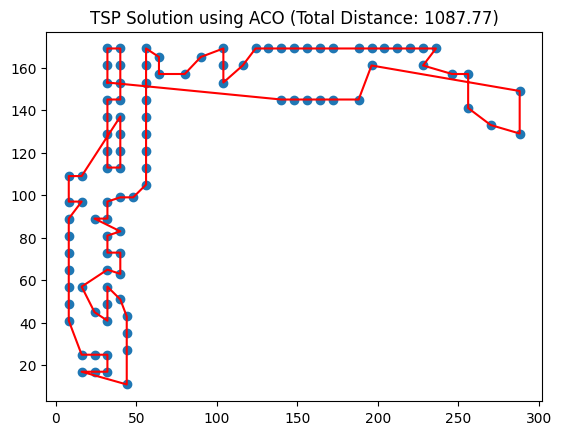

Time taken to render: 56.38993310928345 seconds




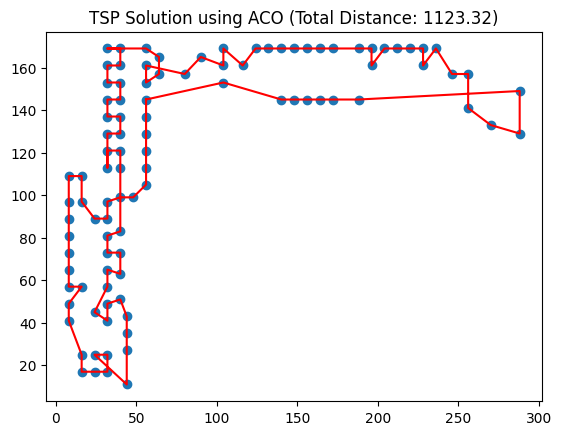

Time taken to render: 55.98527407646179 seconds


Average Tour Length: 1105.5446110476332
Average Time taken to render: 56.18760359287262 seconds


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class AntColony:
    def __init__(self, points, num_ants=10, alpha=1, beta=3, evaporation_rate=0.5):
        self.points = np.array(points)
        self.n = len(points)
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone = np.ones((self.n, self.n))  # Initialize pheromone matrix

    def _update_pheromone(self, tours):
        # Evaporate pheromone
        self.pheromone *= (1 - self.evaporation_rate)
        # Update pheromone on each edge
        for tour in tours:
            for i in range(self.n):
                self.pheromone[tour[i], tour[(i + 1) % self.n]] += 1 / self.total_distance(tour)

    def _select_next_city(self, ant, visited):
        probabilities = (self.pheromone[ant, :] ** self.alpha) * \
                        ((1 / np.linalg.norm(self.points - self.points[ant], axis=1)) ** self.beta)
        probabilities[list(visited)] = 0  # Do not select visited cities
        probabilities /= probabilities.sum()  # Normalize probabilities
        return np.random.choice(np.arange(self.n), p=probabilities)

    def total_distance(self, tour):
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self, max_iter=100):
        best_tour = None
        best_distance = float('inf')
        for _ in range(max_iter):
            tours = []
            for _ in range(self.num_ants):
                ant = np.random.randint(0, self.n)
                visited = {ant}
                tour = [ant]
                for _ in range(self.n - 1):
                    next_city = self._select_next_city(ant, visited)
                    tour.append(next_city)
                    visited.add(next_city)
                    ant = next_city
                tours.append(tour)
            self._update_pheromone(tours)
            # Find the best tour in this iteration
            for tour in tours:
                distance = self.total_distance(tour)
                if distance < best_distance:
                    best_distance = distance
                    best_tour = tour
        return best_tour

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def solve(self):
        aco = AntColony(self.points)
        self.tour = aco.solve()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

    def total_distance(self):
        return np.sum(np.linalg.norm(self.points[self.tour[i]] - self.points[self.tour[i + 1]]) for i in range(self.n - 1))

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(2):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using ACO (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


a280_SA

<ipython-input-2-4b2428c584cd>:26: RuntimeWarning: divide by zero encountered in divide
  ((1 / np.linalg.norm(self.points - self.points[ant], axis=1)) ** self.beta)
<ipython-input-2-4b2428c584cd>:71: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.linalg.norm(self.points[self.tour[i]] - self.points[self.tour[i + 1]]) for i in range(self.n - 1))


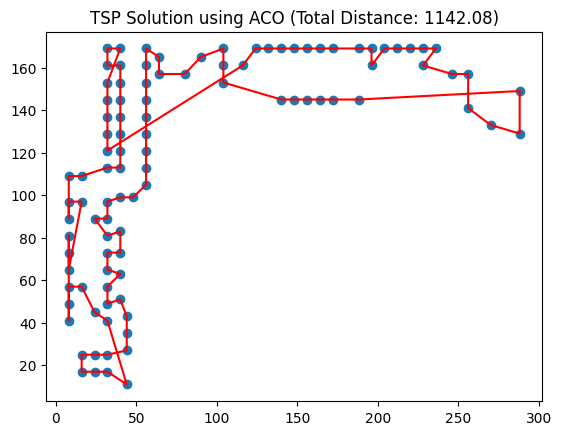

Time taken to render: 58.93366456031799 seconds




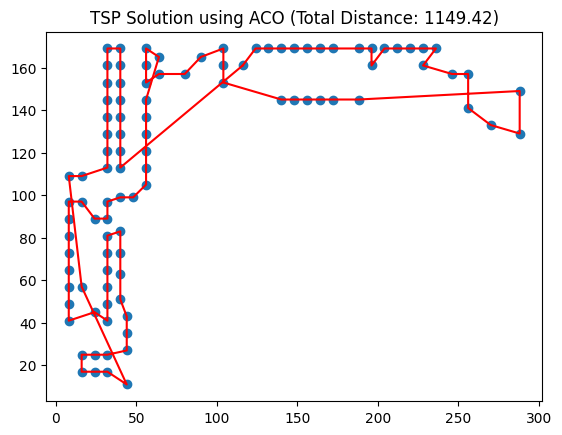

Time taken to render: 54.84766483306885 seconds


Average Tour Length: 1145.7516314585591
Average Time taken to render: 56.89066469669342 seconds


In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class AntColony:
    def __init__(self, points, num_ants=10, alpha=1, beta=3, evaporation_rate=0.5):
        self.points = np.array(points)
        self.n = len(points)
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone = np.ones((self.n, self.n))  # Initialize pheromone matrix

    def _update_pheromone(self, tours):
        # Evaporate pheromone
        self.pheromone *= (1 - self.evaporation_rate)
        # Update pheromone on each edge
        for tour in tours:
            for i in range(self.n):
                self.pheromone[tour[i], tour[(i + 1) % self.n]] += 1 / self.total_distance(tour)

    def _select_next_city(self, ant, visited):
        probabilities = (self.pheromone[ant, :] ** self.alpha) * \
                        ((1 / np.linalg.norm(self.points - self.points[ant], axis=1)) ** self.beta)
        probabilities[list(visited)] = 0  # Do not select visited cities
        probabilities /= probabilities.sum()  # Normalize probabilities
        return np.random.choice(np.arange(self.n), p=probabilities)

    def total_distance(self, tour):
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self, max_iter=100):
        best_tour = None
        best_distance = float('inf')
        for _ in range(max_iter):
            tours = []
            for _ in range(self.num_ants):
                ant = np.random.randint(0, self.n)
                visited = {ant}
                tour = [ant]
                for _ in range(self.n - 1):
                    next_city = self._select_next_city(ant, visited)
                    tour.append(next_city)
                    visited.add(next_city)
                    ant = next_city
                tours.append(tour)
            self._update_pheromone(tours)
            # Find the best tour in this iteration
            for tour in tours:
                distance = self.total_distance(tour)
                if distance < best_distance:
                    best_distance = distance
                    best_tour = tour
        return best_tour

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def solve(self):
        aco = AntColony(self.points)
        self.tour = aco.solve()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

    def total_distance(self):
        return np.sum(np.linalg.norm(self.points[self.tour[i]] - self.points[self.tour[i + 1]]) for i in range(self.n - 1))

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(2):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using ACO (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


a280_NIH

Iteration 4300: Improved total distance to 1132.40
Iteration 9200: Improved total distance to 1130.86


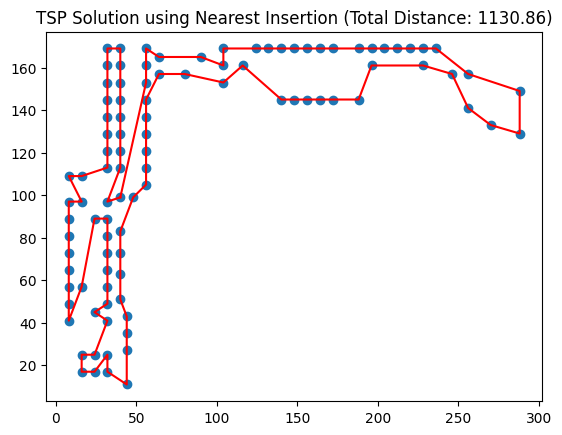

Time taken to render: 6.4193480014801025 seconds


Iteration 7600: Improved total distance to 1141.02


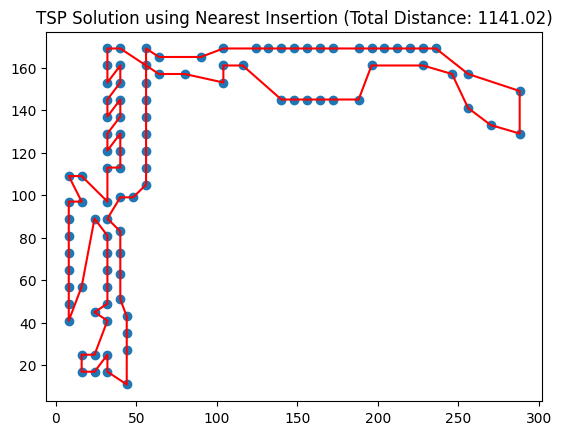

Time taken to render: 9.795155763626099 seconds


Iteration 3100: Improved total distance to 1178.56
Iteration 7200: Improved total distance to 1172.74
Iteration 7600: Improved total distance to 1170.32


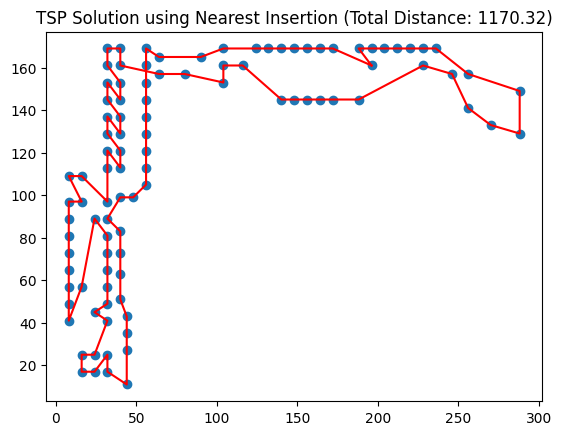

Time taken to render: 5.187110185623169 seconds


Average Tour Length: 1147.3967741162967
Average Time taken to render: 7.13387131690979 seconds


In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_insertion(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            min_distance = float('inf')
            min_city = None
            for i in range(len(tour)):
                for j in unvisited:
                    dist = np.linalg.norm(self.points[tour[i]] - self.points[j]) + np.linalg.norm(self.points[j] - self.points[tour[(i + 1) % len(tour)]]) - np.linalg.norm(self.points[tour[i]] - self.points[tour[(i + 1) % len(tour)]])
                    if dist < min_distance:
                        min_distance = dist
                        min_city = j
                        position = i + 1
            tour.insert(position, min_city)
            unvisited.remove(min_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_insertion()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])
        prev_distance = self.total_distance()

        for i in range(1, self.n - 1):
            for j in range(i + 1, self.n):
                self.tour[i], self.tour[j] = self.tour[j], self.tour[i]
                new_distance = self.total_distance()
                if new_distance < prev_distance:
                    print(f"Iteration {i * self.n + j - 1}: Improved total distance to {new_distance:.2f}")
                    prev_distance = new_distance
                else:
                    self.tour[i], self.tour[j] = self.tour[j], self.tour[i]  # Revert back if the swap doesn't improve the distance


# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest insertion
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Insertion (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")

a280_NNHonly

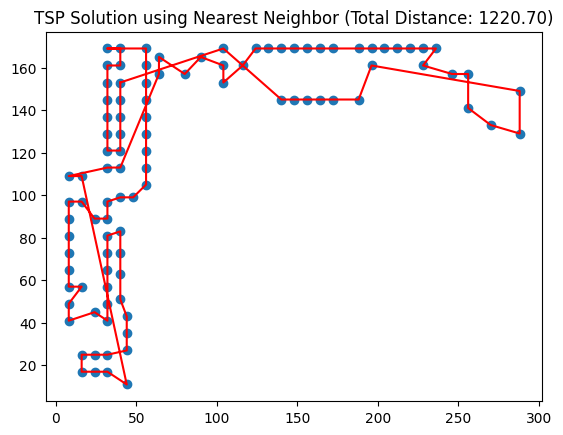

Time taken to render: 0.3349030017852783 seconds




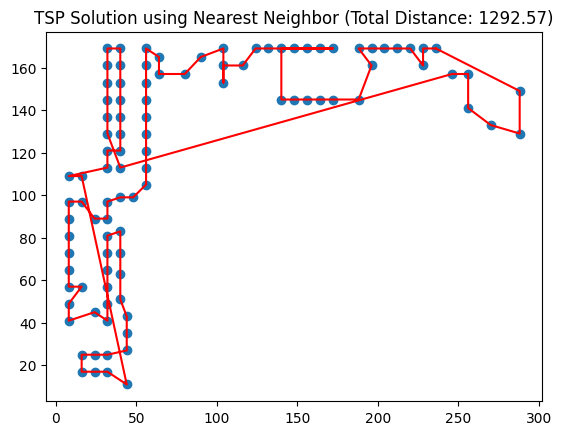

Time taken to render: 0.2985548973083496 seconds




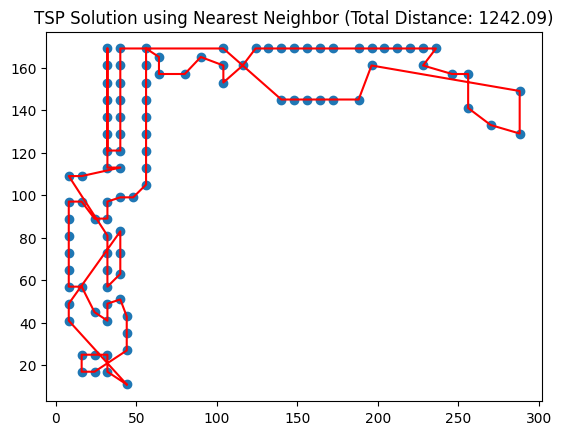

Time taken to render: 0.34898829460144043 seconds




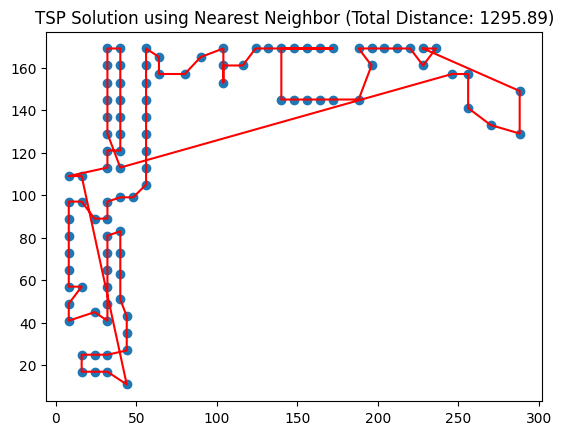

Time taken to render: 0.33656907081604004 seconds




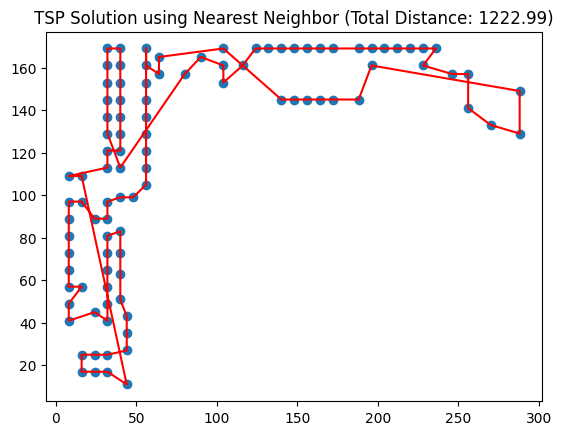

Time taken to render: 0.3313405513763428 seconds




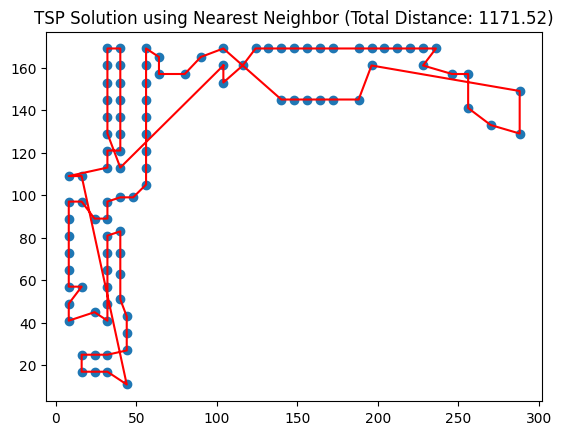

Time taken to render: 0.35216307640075684 seconds




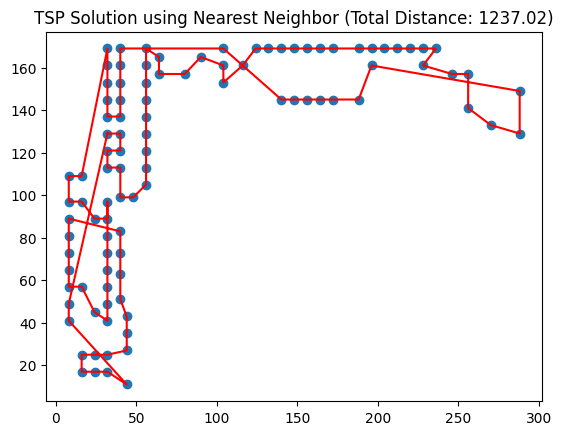

Time taken to render: 0.3005337715148926 seconds




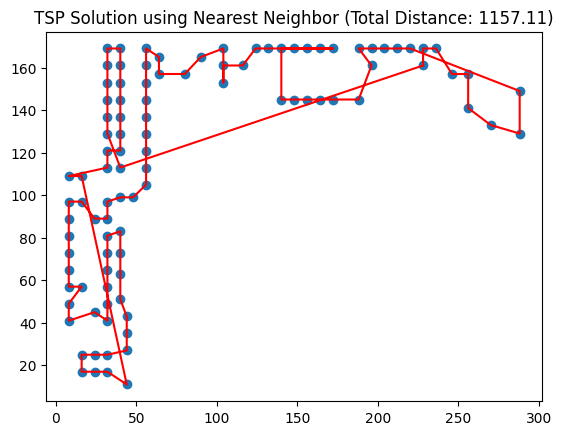

Time taken to render: 0.21235942840576172 seconds




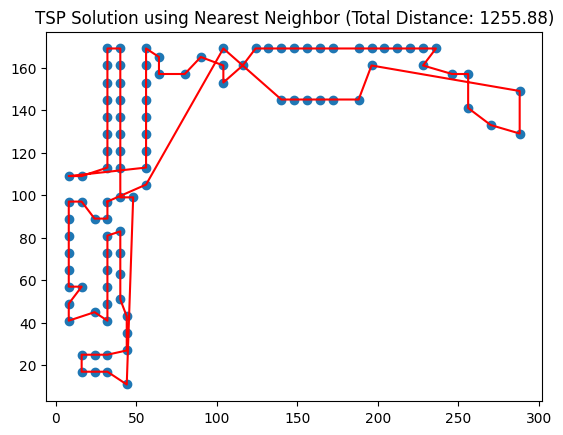

Time taken to render: 0.252852201461792 seconds




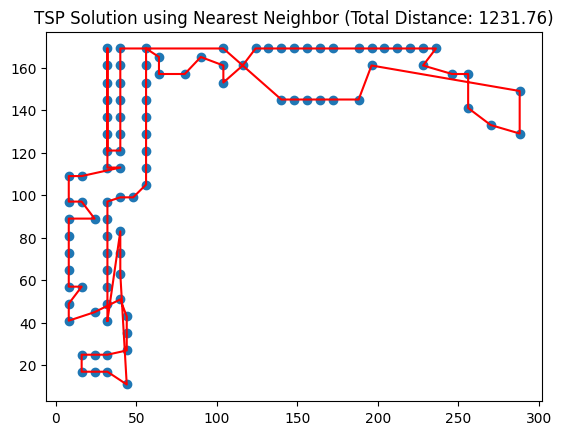

Time taken to render: 0.34815001487731934 seconds


Average Tour Length: 1232.7538731130994
Average Time taken to render: 0.31164143085479734 seconds


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


a280_NNHwith2OPT

Iteration 261: Improved total distance to 1193.01
Iteration 390: Improved total distance to 1188.68
Iteration 1020: Improved total distance to 1167.89
Iteration 1515: Improved total distance to 1166.57
Iteration 1780: Improved total distance to 1158.12
Iteration 1789: Improved total distance to 1158.01
Iteration 2502: Improved total distance to 1152.27
Iteration 3328: Improved total distance to 1135.89
Iteration 5147: Improved total distance to 1135.70
Iteration 5239: Improved total distance to 1130.50
Iteration 5422: Improved total distance to 1130.26
Iteration 5686: Improved total distance to 1126.17
Iteration 8077: Improved total distance to 1121.85
Iteration 8078: Improved total distance to 1119.63
Iteration 9982: Improved total distance to 1114.94
Iteration 10164: Improved total distance to 1108.32


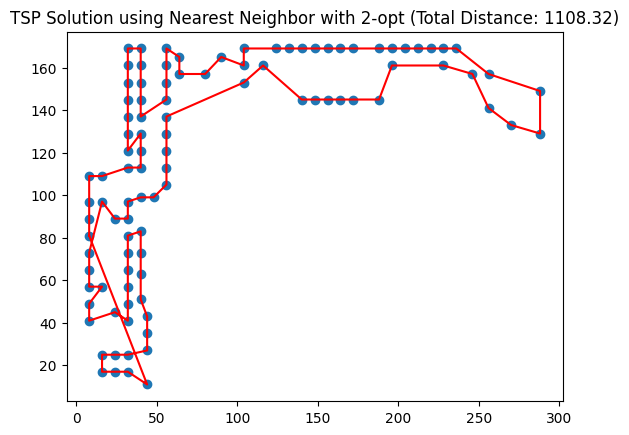

Time taken to render: 16.199729204177856 seconds


Iteration 84: Improved total distance to 1247.95
Iteration 448: Improved total distance to 1236.68
Iteration 1387: Improved total distance to 1233.16
Iteration 1459: Improved total distance to 1227.43
Iteration 2481: Improved total distance to 1211.05
Iteration 3819: Improved total distance to 1203.71
Iteration 3902: Improved total distance to 1195.05
Iteration 3981: Improved total distance to 1188.03
Iteration 4056: Improved total distance to 1179.05
Iteration 4127: Improved total distance to 1172.94
Iteration 4194: Improved total distance to 1163.05
Iteration 4259: Improved total distance to 1158.72
Iteration 4404: Improved total distance to 1153.11
Iteration 4600: Improved total distance to 1153.11
Iteration 4621: Improved total distance to 1140.55
Iteration 4664: Improved total distance to 1140.55
Iteration 4677: Improved total distance to 1127.97
Iteration 4754: Improved total distance to 1121.02
Iteration 4843: Improved total dis

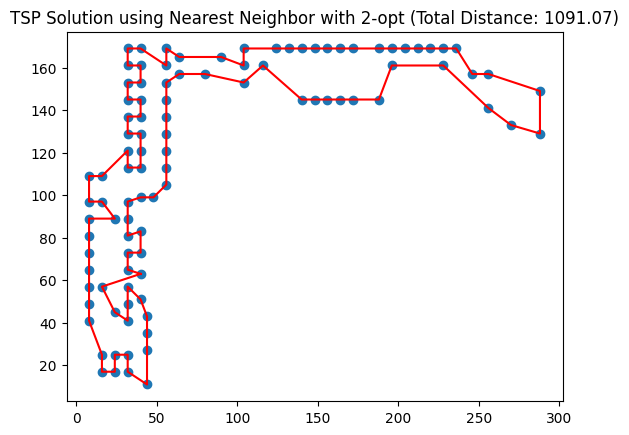

Time taken to render: 19.424907684326172 seconds


Iteration 1265: Improved total distance to 1227.16
Iteration 1267: Improved total distance to 1202.42
Iteration 1971: Improved total distance to 1192.17
Iteration 2060: Improved total distance to 1187.84
Iteration 2550: Improved total distance to 1167.06
Iteration 2925: Improved total distance to 1165.73
Iteration 3130: Improved total distance to 1157.28
Iteration 3139: Improved total distance to 1157.17
Iteration 3652: Improved total distance to 1151.44
Iteration 4198: Improved total distance to 1135.06
Iteration 4710: Improved total distance to 1128.43
Iteration 6817: Improved total distance to 1128.23
Iteration 6889: Improved total distance to 1123.03
Iteration 7032: Improved total distance to 1122.80
Iteration 7236: Improved total distance to 1118.70
Iteration 8947: Improved total distance to 1114.38
Iteration 8948: Improved total distance to 1112.17
Iteration 11632: Improved total distance to 1107.48
Iteration 11774: Improved tota

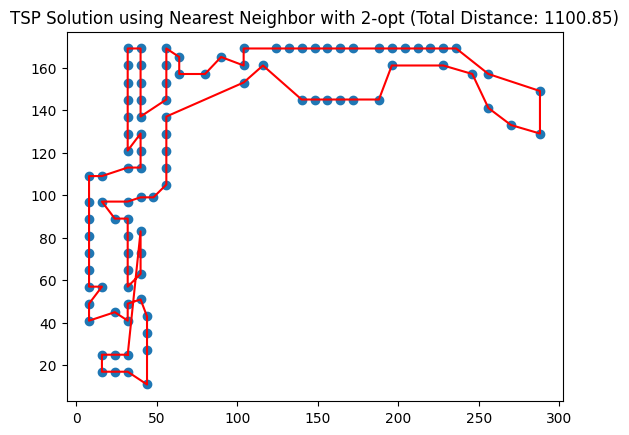

Time taken to render: 21.28050398826599 seconds


Iteration 388: Improved total distance to 1212.56
Iteration 475: Improved total distance to 1210.51
Iteration 937: Improved total distance to 1206.79
Iteration 980: Improved total distance to 1205.29
Iteration 992: Improved total distance to 1205.15
Iteration 993: Improved total distance to 1198.77
Iteration 1067: Improved total distance to 1194.75
Iteration 1068: Improved total distance to 1192.08
Iteration 1465: Improved total distance to 1190.01
Iteration 3765: Improved total distance to 1180.12
Iteration 4842: Improved total distance to 1169.32
Iteration 4934: Improved total distance to 1165.54
Iteration 5940: Improved total distance to 1163.60
Iteration 5948: Improved total distance to 1152.21
Iteration 6032: Improved total distance to 1150.46
Iteration 6114: Improved total distance to 1145.87
Iteration 6196: Improved total distance to 1144.11
Iteration 6276: Improved total distance to 1140.80
Iteration 6277: Improved total distanc

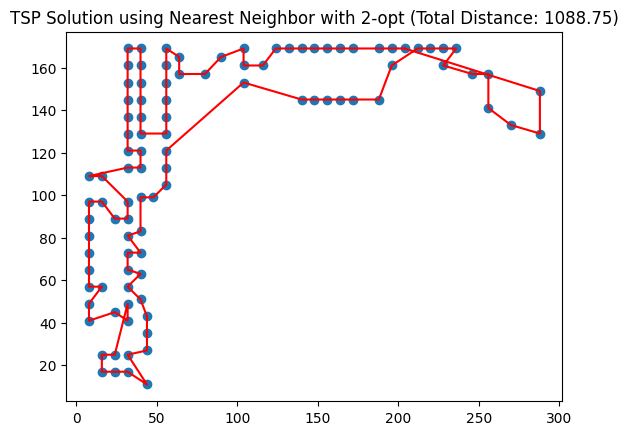

Time taken to render: 22.427040338516235 seconds


Iteration 199: Improved total distance to 1202.50
Iteration 1008: Improved total distance to 1194.60
Iteration 2060: Improved total distance to 1190.27
Iteration 2550: Improved total distance to 1169.48
Iteration 2925: Improved total distance to 1168.16
Iteration 3130: Improved total distance to 1159.71
Iteration 3139: Improved total distance to 1159.60
Iteration 3652: Improved total distance to 1153.86
Iteration 4198: Improved total distance to 1137.48
Iteration 6817: Improved total distance to 1137.29
Iteration 6889: Improved total distance to 1132.09
Iteration 7032: Improved total distance to 1131.86
Iteration 7236: Improved total distance to 1127.76
Iteration 8947: Improved total distance to 1123.44
Iteration 8948: Improved total distance to 1121.22
Iteration 11632: Improved total distance to 1116.54
Iteration 11774: Improved total distance to 1109.91


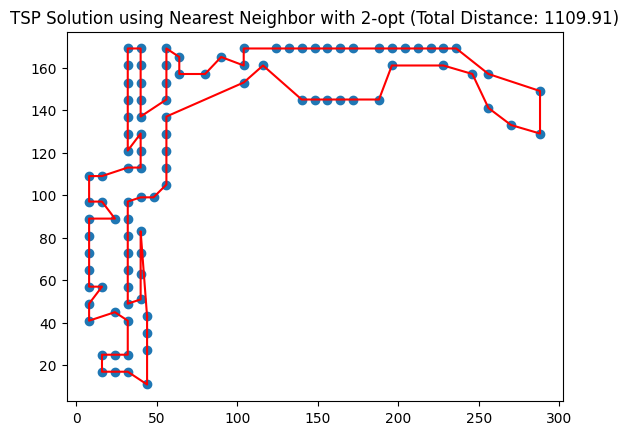

Time taken to render: 18.1719491481781 seconds


Average Tour Length: 1099.7799286654076
Average Time taken to render: 19.50082607269287 seconds


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

# Rerun TSP solving process 5 times
for i in range(5):
    start_time = time.time()  # Start timing for this run
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


a280_NNHwith3OPT

Iteration 6: Improved total distance to 1204.08
Iteration 74137: Improved total distance to 1177.34


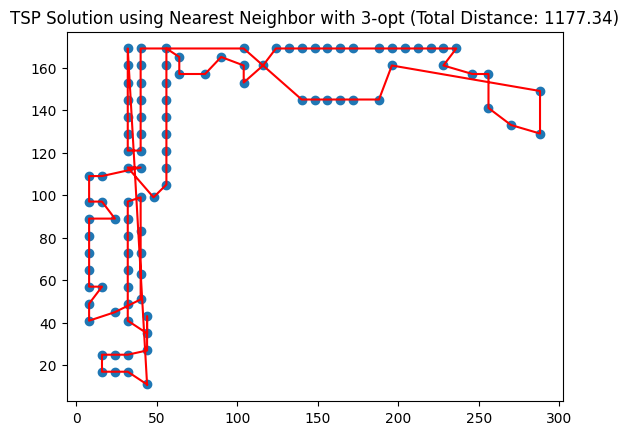

Time taken to render: 31.598538875579834 seconds


Iteration 127915: Improved total distance to 1239.45
Iteration 127988: Improved total distance to 1236.94
Iteration 131595: Improved total distance to 1233.77
Iteration 276457: Improved total distance to 1216.03
Iteration 279141: Improved total distance to 1210.77
Iteration 294894: Improved total distance to 1150.73
Iteration 426151: Improved total distance to 1142.16


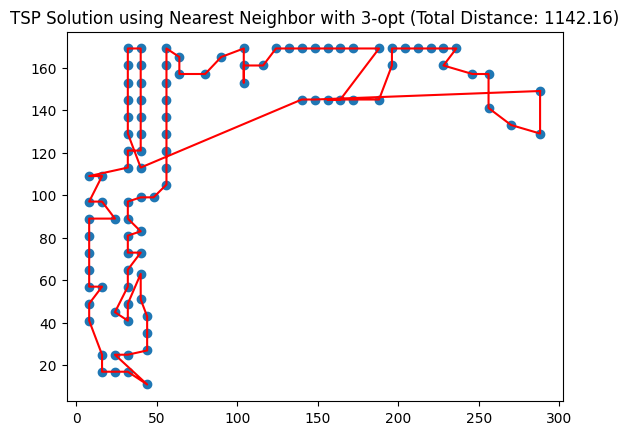

Time taken to render: 58.87803816795349 seconds


Iteration 1335: Improved total distance to 1236.74
Iteration 45119: Improved total distance to 1227.00
Iteration 85985: Improved total distance to 1224.77
Iteration 91114: Improved total distance to 1216.96
Iteration 95494: Improved total distance to 1214.39
Iteration 98715: Improved total distance to 1183.23
Iteration 244768: Improved total distance to 1170.85
Iteration 244831: Improved total distance to 1170.79
Iteration 290849: Improved total distance to 1166.60
Iteration 294232: Improved total distance to 1161.39
Iteration 385174: Improved total distance to 1153.11
Iteration 392601: Improved total distance to 1150.72
Iteration 438667: Improved total distance to 1144.72
Iteration 440318: Improved total distance to 1139.88
Iteration 536096: Improved total distance to 1129.98


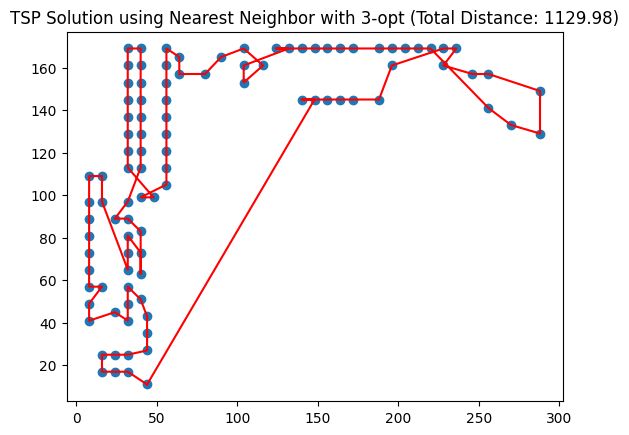

Time taken to render: 66.67662024497986 seconds


Average Tour Length: 1149.8254728884767
Average Time taken to render: 52.38439909617106 seconds


In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s+(\d+)\s+(\d+)\s+(\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "a280.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")
